In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root_path = '/content/'
project_path = '/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/NEW DATA AND VIZ/'
viz_path = '/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Visualizations/CERME/'
data_path = '/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERME/'

# Creating csv with full texts from pdfs

## Pdfminer

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
!pip install PyPDF2

     |████████████████████████████████| 81kB 2.5MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-cp36-none-any.whl size=61086 sha256=c0aff765971f4c78ed36712947fb621f1137ab001b40f3b551456873c9a67d0b
  Stored in directory: /root/.cache/pip/wheels/53/84/19/35bc977c8bf5f0c23a8a011aa958acd4da4bbd7a229315c1b7
Successfully built PyPDF2


In [ ]:
!pip install pdfminer.six

     |████████████████████████████████| 5.6MB 3.2MB/s 
     |████████████████████████████████| 13.7MB 52.5MB/s 


In [ ]:
from PyPDF2 import PdfFileReader
import os

# Get all PDF filenames from a folder 'pdfpath'.
pdfpath = '/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERME/'
# Generate list pdfFiles containing all pdf file paths
pdfFiles = []
# Generate list pdfNames containing all pdf names
pdfNames = []
for filename in os.listdir(pdfpath):
  if filename.endswith('.pdf'):
    filepath = pdfpath + filename
    pdfFiles.append(filepath)
    pdfFiles.sort(key=str.lower)
    pdfNames.append(filename)
    pdfNames.sort(key=str.lower)

KeyboardInterrupt: ignored

In [ ]:
print(len(pdfFiles))

In [ ]:
# initialize list of lists 
pdfdata = [] 
  
# Create the pandas DataFrame 
df_pdf = pd.DataFrame(pdfdata, columns = ['Filename', 'Page', 'Text']) 
  
# print dataframe. 
df_pdf

In [ ]:
# Extract pdf texts to dataframe: df_pdf
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.pdfpage import PDFPage
from pdfminer.converter import XMLConverter, HTMLConverter, TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfdocument import PDFDocument
from pdfminer.pdfparser import PDFParser
import io
import os

numberofpdfs = len(pdfFiles)
for a in range(numberofpdfs):
  filename = pdfNames[a]
  
  pdf_document = pdfFiles[a]
  with open(pdf_document, "rb") as filehandle:
    pdf = PdfFileReader(filehandle)
    info = pdf.getDocumentInfo()
    pages = pdf.getNumPages()


    fp = open(pdf_document, 'rb')
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    print(type(retstr))
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    
    page_no = 0
    for pageNumber, page in enumerate(PDFPage.get_pages(fp)):
        if pageNumber == page_no:
            interpreter.process_page(page)

            data = retstr.getvalue()
            df_pdf.loc[len(df_pdf)] = [filename, page_no+1, str(data)]

            data = ''
            retstr.truncate(0)
            retstr.seek(0)

        page_no += 1

In [ ]:
df_pdf

,Filename,Page,Text
0,CERME_10_group_15_paper_1.pdf,1,Analysing MOOCs in terms of teacher collaborat...
1,CERME_10_group_15_paper_1.pdf,2,\n\n \n\nAnalysing MOOCs in terms of teacher ...
2,CERME_10_group_15_paper_1.pdf,3,\n\n \n\nGeometria) aims at creating coll...
3,CERME_10_group_15_paper_1.pdf,4,\n\n \n\nDescription of the MOOC eFAN Maths \...
4,CERME_10_group_15_paper_1.pdf,5,\n\n \n\nmathematical situation. An analys...
...,...,...,...
2925,CERME_9_group_16_paper_9.pdf,4,Technology-mediated realistic mathematics educ...
2926,CERME_9_group_16_paper_9.pdf,5,Technology-mediated realistic mathematics educ...
2927,CERME_9_group_16_paper_9.pdf,6,Technology-mediated realistic mathematics educ...
2928,CERME_9_group_16_paper_9.pdf,7,Technology-mediated realistic mathematics educ...


In [ ]:
df_pdf['cleantext'] = df_pdf['Text'].str.replace(r'\s+|\\n', ' ', regex=True)
df_pdf

,Filename,Page,Text,cleantext
0,CERME_10_group_15_paper_1.pdf,1,Analysing MOOCs in terms of teacher collaborat...,Analysing MOOCs in terms of teacher collaborat...
1,CERME_10_group_15_paper_1.pdf,2,\n\n \n\nAnalysing MOOCs in terms of teacher ...,Analysing MOOCs in terms of teacher collabora...
2,CERME_10_group_15_paper_1.pdf,3,\n\n \n\nGeometria) aims at creating coll...,Geometria) aims at creating collaborative con...
3,CERME_10_group_15_paper_1.pdf,4,\n\n \n\nDescription of the MOOC eFAN Maths \...,Description of the MOOC eFAN Maths The MOOC e...
4,CERME_10_group_15_paper_1.pdf,5,\n\n \n\nmathematical situation. An analys...,mathematical situation. An analysis grid focu...
...,...,...,...,...
2925,CERME_9_group_16_paper_9.pdf,4,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...
2926,CERME_9_group_16_paper_9.pdf,5,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...
2927,CERME_9_group_16_paper_9.pdf,6,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...
2928,CERME_9_group_16_paper_9.pdf,7,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...


In [ ]:
df_pdf.cleantext[3]

' Description of the MOOC eFAN Maths The MOOC eFAN Maths4 was delivered on a French national platform (FUN, France Universités Numérique) and its target was the French-speaking community all over the world, namely mathematics teachers and teacher educators willing to improve their practices in using technology in their classrooms. The second season of the MOOC, which is reported in this paper, lasted from the 8th of March to mid-April 2016 and was organised in five weeks. The MOOC eFAN Maths is part of the Stratégie Mathematiques of the French Ministry of Education, which stresses the relationship of mathematics with other sciences and with the world, and aims at training teachers in this perspective in order to give students a refreshed image of mathematics. More specifically, this season of the MOOC was created with a double institutional aim: to support teachers and teacher educators in understanding and implementing the new French curriculum (since September 2016 in all French prim

In [ ]:
df_pdf_newdoc = df_pdf[df_pdf['cleantext'].str.contains('HAL Id:')]

In [ ]:
df_pdf_newdoc['newdoc'] = True

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy [ipykernel_launcher.py:1]


In [ ]:
df_pdf_new = df_pdf.merge(df_pdf_newdoc, how='outer')

In [ ]:
a = False

In [ ]:
b = df_pdf_new['newdoc'].fillna(a)

In [ ]:
df_pdf_new['newdocbool'] = b

In [ ]:
df_pdf_new.drop("newdoc", axis=1, inplace=True)

In [ ]:
df_pdf_new.newdocbool.value_counts()

False    2767
Name: newdocbool, dtype: int64

In [ ]:
df_pdf_new = df_pdf_new[df_pdf_new['newdocbool'] == False]  # df will have only rows with True in c3

In [ ]:
df_pdf_new

,Filename,Page,Text,cleantext,newdocbool
1,CERME_10_group_15_paper_1.pdf,2,\n\n \n\nAnalysing MOOCs in terms of teacher ...,Analysing MOOCs in terms of teacher collabora...,False
2,CERME_10_group_15_paper_1.pdf,3,\n\n \n\nGeometria) aims at creating coll...,Geometria) aims at creating collaborative con...,False
3,CERME_10_group_15_paper_1.pdf,4,\n\n \n\nDescription of the MOOC eFAN Maths \...,Description of the MOOC eFAN Maths The MOOC e...,False
4,CERME_10_group_15_paper_1.pdf,5,\n\n \n\nmathematical situation. An analys...,mathematical situation. An analysis grid focu...,False
5,CERME_10_group_15_paper_1.pdf,6,"\n\n \n\nsequence, managing available artefac...","sequence, managing available artefacts, etc.,...",False
...,...,...,...,...,...
2925,CERME_9_group_16_paper_9.pdf,4,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...,False
2926,CERME_9_group_16_paper_9.pdf,5,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...,False
2927,CERME_9_group_16_paper_9.pdf,6,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...,False
2928,CERME_9_group_16_paper_9.pdf,7,Technology-mediated realistic mathematics educ...,Technology-mediated realistic mathematics educ...,False


In [ ]:
df_pdf_ft = df_pdf_new.groupby('Filename')['cleantext'].apply(lambda x: "%s" % ' '.join(x))

In [ ]:
df_pdf_ft = pd.DataFrame(df_pdf_ft)

In [ ]:
df_pdf_ft = df_pdf_ft.reset_index()

In [ ]:
df_pdf_ft.columns

Index(['Filename', 'cleantext'], dtype='object')

In [ ]:
print(df_pdf_ft['cleantext'][0])

 Analysing MOOCs in terms of teacher collaboration potential and issues: the French experience Monica Panero1, Gilles Aldon1, Jana Trgalová2 and Luc Trouche1 1University of Lyon, ENS de Lyon-Institut Français de l’Education, S2HEP-EducTice, France; monica.panero@ens-lyon.fr, gilles.aldon@ens-lyon.fr, luc.trouche@ens-lyon.fr 2 University of Lyon, Claude Bernard University Lyon 1, S2HEP (EA4148), France; jana.trgalova@univ-lyon1.fr The main aim of this paper is to analyse the experience of a MOOC for teacher training implemented in France, in parallel with a similar experience in Italy. The study focuses on teacher collaboration within such an online learning environment, in terms of co-working and co-learning. The Italian and the French teams outlined a common starting point of the research and some common research concerns (see the Introduction). Each team then reformulated the research questions and tried to answer them through specific theoretical lenses. In the case of the French MO

In [ ]:
df_pdf_ft.cleantext = df_pdf_ft.cleantext.str.strip()

In [ ]:
df_pdf_ft = df_pdf_ft.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df_pdf_ft['cleantext'][292]

nan

In [ ]:
import re

In [ ]:
df_pdf_ft_1 = df_pdf_ft

In [ ]:
for a in range(len(df_pdf_ft_1)):
  df_pdf_ft_1['Filename'][a] = re.sub(r'.pdf', '', df_pdf_ft_1['Filename'][a])

In [ ]:
df_pdf_ft_1['Filename'].str.replace(r'.pdf', '')
df_pdf_ft_1.head()

,Filename,cleantext,cermegroup,cermeyear
0,CERME_10_group_15_paper_1,Analysing MOOCs in terms of teacher collaborat...,CERME_10_group_15,CERME_10
1,CERME_10_group_15_paper_10,‘Walking a graph’ – primary school students’ e...,CERME_10_group_15,CERME_10
2,CERME_10_group_15_paper_11,Using a flipped classroom approach in the teac...,CERME_10_group_15,CERME_10
3,CERME_10_group_15_paper_12,What can we assess using multiple choice probl...,CERME_10_group_15,CERME_10
4,CERME_10_group_15_paper_13,Planning geometry lessons with learning platfo...,CERME_10_group_15,CERME_10


In [ ]:
df_pdf_ft_1.cleantext = df_pdf_ft_1.cleantext.str.replace(r'(\(cid\:[0-9]+\))', '')

In [ ]:
df_pdf_ft_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    341 non-null    object
 1   cleantext   270 non-null    object
 2   cermegroup  341 non-null    object
 3   cermeyear   341 non-null    object
dtypes: object(4)
memory usage: 10.8+ KB


In [ ]:
df_pdf_ft_1['cermegroup'] = df_pdf_ft_1['Filename']
for a in range(len(df_pdf_ft_1)):
  df_pdf_ft_1['cermegroup'][a] = re.sub(r'_paper_\d+', '', df_pdf_ft_1['Filename'][a])

In [ ]:
df_pdf_ft_1['cermeyear'] = df_pdf_ft_1['Filename']
for a in range(len(df_pdf_ft_1)):
  df_pdf_ft_1['cermeyear'][a] = re.sub(r'_group_\d+_paper_\d+', '', df_pdf_ft_1['Filename'][a])

In [ ]:
df_pdf_ft_1

,Filename,cleantext,cermegroup,cermeyear
0,CERME_10_group_15_paper_1,Analysing MOOCs in terms of teacher collaborat...,CERME_10_group_15,CERME_10
1,CERME_10_group_15_paper_10,‘Walking a graph’ – primary school students’ e...,CERME_10_group_15,CERME_10
2,CERME_10_group_15_paper_11,Using a flipped classroom approach in the teac...,CERME_10_group_15,CERME_10
3,CERME_10_group_15_paper_12,What can we assess using multiple choice probl...,CERME_10_group_15,CERME_10
4,CERME_10_group_15_paper_13,Planning geometry lessons with learning platfo...,CERME_10_group_15,CERME_10
...,...,...,...,...
336,CERME_9_group_16_paper_5,The use of hands and manipulation touchscreen ...,CERME_9_group_16,CERME_9
337,CERME_9_group_16_paper_6,How a digital place value chart could foster s...,CERME_9_group_16,CERME_9
338,CERME_9_group_16_paper_7,Peer learning in mathematics forum on Facebook...,CERME_9_group_16,CERME_9
339,CERME_9_group_16_paper_8,Using tree diagrams to develop combinatorial r...,CERME_9_group_16,CERME_9


In [ ]:
df_pdf_ft_1.cermeyear.value_counts()

CERME_11    64
CERME_10    54
CERME_9     47
CERME_6     40
CERME_8     29
CERME_7     24
CERME_5     22
CERME_3     21
CERME_4     19
CERME_2     12
CERME_1      9
Name: cermeyear, dtype: int64

In [ ]:
df_pdf_ft_1.to_csv('/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERMEtechPAPERScolab.csv', sep='\t')

## OCR for unreadable by pdfminer

In [ ]:
!apt-get install poppler-utils
!sudo apt install tesseract-ocr
!pip install pytesseract
!pip install pdf2image

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 32 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.10 [154 kB]
Fetched 154 kB in 2s (91.6 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 144514 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.10_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.10) ...
Setting up poppler-utils (0.62.0-2ubuntu2.10) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
0 upgraded, 0

In [ ]:
import pytesseract
import shutil
import os
import random
try:
 from PIL import Image
except ImportError:
 import Image

In [ ]:
import os
from pdf2image import convert_from_path

pdf_dir = r"/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERME/unreadable pdfminer"
os.chdir(pdf_dir)

for pdf_file in os.listdir(pdf_dir):

    if pdf_file.endswith(".pdf"):

        #pages = convert_from_path(pdf_file, 300, poppler_path='C:/Users/jdrey/Desktop/poppler-0.68.0/bin')
        pages = convert_from_path(pdf_file, 500)
        pdf_file = pdf_file[:-4]

        for page in pages:

            page.save("%s-page%d.jpg" % (pdf_file,pages.index(page)), "JPEG")

In [ ]:
import os

# Get all JPG filenames from a folder 'jpgpath'.
jpgpath = '/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERME/unreadable pdfminer/'
# Generate list jpgFiles containing all jpg file paths
jpgFiles = []
# Generate list jpgNames containing all jpg names
jpgNames = []
for filename in os.listdir(jpgpath):
  if filename.endswith('.jpg'):
    filepath = jpgpath + filename
    jpgFiles.append(filepath)
    jpgFiles.sort(key=str.lower)
    jpgNames.append(filename)
    jpgNames.sort(key=str.lower)



In [ ]:
len(jpgFiles)

721

In [ ]:
# initialize list of lists 
jpgdata = [] 
  
# Create the pandas DataFrame 
df_jpg = pd.DataFrame(jpgdata, columns = ['Filename', 'Text']) 
  
# print dataframe. 
df_jpg

,Filename,Text


In [ ]:
!pip install tqdm

In [ ]:
from tqdm import tqdm

numberofjpgs = len(jpgFiles)
for a in tqdm(range(numberofjpgs)):
  filename = jpgNames[a]

  jpg_document = jpgFiles[a]
  with open(jpg_document, 'rb') as filehandle:
    data = pytesseract.image_to_string(Image.open(jpg_document))
    df_jpg.loc[len(df_jpg)] = [filename, str(data)]
    data = ''

100%|██████████| 721/721 [1:25:17<00:00,  7.10s/it]


In [ ]:
df_jpg

,Filename,Text
0,CERME_1_group_2_paper_1-page0.jpg,European Research in Mathematics Education I: ...
1,CERME_1_group_2_paper_1-page1.jpg,European Research in Mathematics Education I: ...
2,CERME_1_group_2_paper_1-page2.jpg,European Research in Mathematics Education I: ...
3,CERME_1_group_2_paper_1-page3.jpg,European Research in Mathematics Education I: ...
4,CERME_1_group_2_paper_1-page4.jpg,European Research in Mathematics Education I: ...
...,...,...
781,CERME_8_group_15_paper_8-page5.jpg,WORKING GROUP 15\n\nA TEACHER LEARNING TO USE ...
782,CERME_8_group_15_paper_8-page6.jpg,WORKING GROUP 15\n\n \n\nFig 4: The mosaic pr...
783,CERME_8_group_15_paper_8-page7.jpg,"WORKING GROUP 15\n\nAs I have mentioned, you a..."
784,CERME_8_group_15_paper_8-page8.jpg,WORKING GROUP 15\n\nCONCLUSIONS\n\nThe analysi...


In [ ]:
import re
for a in range(len(df_jpg)):
  df_jpg['Filename'][a] = re.sub(r'-page\d+.jpg', '', df_jpg['Filename'][a])

In [ ]:
df_jpg

,Filename,Text
0,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...
1,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...
2,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...
3,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...
4,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...
...,...,...
781,CERME_8_group_15_paper_8,WORKING GROUP 15\n\nA TEACHER LEARNING TO USE ...
782,CERME_8_group_15_paper_8,WORKING GROUP 15\n\n \n\nFig 4: The mosaic pr...
783,CERME_8_group_15_paper_8,"WORKING GROUP 15\n\nAs I have mentioned, you a..."
784,CERME_8_group_15_paper_8,WORKING GROUP 15\n\nCONCLUSIONS\n\nThe analysi...


In [ ]:
df_jpg_grouped = df_jpg.groupby('Filename')['Text'].apply(lambda x: "%s" % ' '.join(x))
pd.DataFrame(df_jpg_grouped)
df_jpg_grouped = df_jpg_grouped.reset_index()

In [ ]:
df_jpg_grouped['Text'] = df_jpg_grouped['Text'].str.replace(r'-\\n', '', regex=True)
df_jpg_grouped['cleantext'] = df_jpg_grouped['Text'].str.replace(r'\s+|\\n', ' ', regex=True)
df_jpg_grouped

,Filename,Text,cleantext
0,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...,European Research in Mathematics Education I: ...
1,CERME_1_group_2_paper_2,European Research in Mathematics Education I: ...,European Research in Mathematics Education I: ...
2,CERME_1_group_2_paper_3,European Research in Mathematics Education I: ...,European Research in Mathematics Education I: ...
3,CERME_1_group_2_paper_4,European Research in Mathematics Education I: ...,European Research in Mathematics Education I: ...
4,CERME_1_group_2_paper_5,European Research in Mathematics Education I: ...,European Research in Mathematics Education I: ...
...,...,...,...
66,CERME_8_group_15_paper_4,WORKING GROUP 15\n\nTEACHING INVERSE FUNCTIONS...,WORKING GROUP 15 TEACHING INVERSE FUNCTIONS AT...
67,CERME_8_group_15_paper_5,WORKING GROUP 15\nREACTIONS OF PRE-SERVICE ELE...,WORKING GROUP 15 REACTIONS OF PRE-SERVICE ELEM...
68,CERME_8_group_15_paper_6,WORKING GROUP 15\n\nHOW TEACHERS LEARN TO USE ...,WORKING GROUP 15 HOW TEACHERS LEARN TO USE COM...
69,CERME_8_group_15_paper_7,WORKING GROUP 15\n\nMATHEMATICS TEACHING ON TH...,WORKING GROUP 15 MATHEMATICS TEACHING ON THE W...


In [ ]:
df_jpg_grouped['cermegroup'] = df_jpg_grouped['Filename']
for a in range(len(df_jpg_grouped)):
  df_jpg_grouped['cermegroup'][a] = re.sub(r'_paper_\d+', '', df_jpg_grouped['Filename'][a])

In [ ]:
df_jpg_grouped['cermeyear'] = df_jpg_grouped['Filename']
for a in range(len(df_jpg_grouped)):
  df_jpg_grouped['cermeyear'][a] = re.sub(r'_group_\d+_paper_\d+', '', df_jpg_grouped['Filename'][a])

In [ ]:
df_jpg_grouped.pop('Text')

0     European Research in Mathematics Education I: ...
1     European Research in Mathematics Education I: ...
2     European Research in Mathematics Education I: ...
3     European Research in Mathematics Education I: ...
4     European Research in Mathematics Education I: ...
                            ...                        
66    WORKING GROUP 15\n\nTEACHING INVERSE FUNCTIONS...
67    WORKING GROUP 15\nREACTIONS OF PRE-SERVICE ELE...
68    WORKING GROUP 15\n\nHOW TEACHERS LEARN TO USE ...
69    WORKING GROUP 15\n\nMATHEMATICS TEACHING ON TH...
70    WORKING GROUP 15\n\nCONTINUING PROFESSIONAL DE...
Name: Text, Length: 71, dtype: object

In [ ]:
df_jpg_grouped

,Filename,cleantext,cermegroup,cermeyear
0,CERME_1_group_2_paper_1,European Research in Mathematics Education I: ...,CERME_1_group_2,CERME_1
1,CERME_1_group_2_paper_2,European Research in Mathematics Education I: ...,CERME_1_group_2,CERME_1
2,CERME_1_group_2_paper_3,European Research in Mathematics Education I: ...,CERME_1_group_2,CERME_1
3,CERME_1_group_2_paper_4,European Research in Mathematics Education I: ...,CERME_1_group_2,CERME_1
4,CERME_1_group_2_paper_5,European Research in Mathematics Education I: ...,CERME_1_group_2,CERME_1
...,...,...,...,...
66,CERME_8_group_15_paper_4,WORKING GROUP 15 TEACHING INVERSE FUNCTIONS AT...,CERME_8_group_15,CERME_8
67,CERME_8_group_15_paper_5,WORKING GROUP 15 REACTIONS OF PRE-SERVICE ELEM...,CERME_8_group_15,CERME_8
68,CERME_8_group_15_paper_6,WORKING GROUP 15 HOW TEACHERS LEARN TO USE COM...,CERME_8_group_15,CERME_8
69,CERME_8_group_15_paper_7,WORKING GROUP 15 MATHEMATICS TEACHING ON THE W...,CERME_8_group_15,CERME_8


In [ ]:
print(df_jpg_grouped['cleantext'][70])

WORKING GROUP 15 CONTINUING PROFESSIONAL DEVELOPMENT AND DIGITAL MEDIA IN MATHEMATICS EDUCATION Maria Alice Gravina, Marina Menna Baretto, Marcia Notare Instituto de Matematica, Universidade Federal do Rio Grande do Sul, Porto Alegre, Brazil This paper presents the results of a study in a continuing professional program for mathematics teachers that had as main objective the integration of digital media in their teaching practices. The program was offered in a distance education modality. The didactic material was designed taking into account cognitive aspects that can transform the digital media into a powerful math learning tool. The analysis the didactic material is based on the semiotic potential of an artifact and the analysis of the learning process makes reference to the instrumental genesis theory. INTRODUCTION Studies on mathematics teaching and learning in digital environments have been developed since Papert’s work (the turtle geometry in the 80’s). Since then, a considerabl

In [ ]:
df_jpg_grouped.to_csv('/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERMEtechPAPERSjpg.csv', sep='\t')

## Merge ocr and non-ocr texts

In [ ]:
df_ocr = pd.read_csv('/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERMEtechPAPERSjpg.csv', sep='\t')
df_ocr.pop('Unnamed: 0')

0      0
1      1
2      2
3      3
4      4
      ..
66    66
67    67
68    68
69    69
70    70
Name: Unnamed: 0, Length: 71, dtype: int64

In [ ]:
df_non = pd.read_csv('/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERMEtechPAPERScolab.csv', sep='\t')
df_non.pop('Unnamed: 0')

0        0
1        1
2        2
3        3
4        4
      ... 
336    336
337    337
338    338
339    339
340    340
Name: Unnamed: 0, Length: 341, dtype: int64

In [ ]:
df_none = df_non.dropna()

In [ ]:
df_non.cermegroup.value_counts()

CERME_11_group_16    44
CERME_6_group_7      40
CERME_8_group_15     29
CERME_10_group_16    28
CERME_10_group_15    26
CERME_9_group_16     25
CERME_7_group_15     24
CERME_9_group_15     22
CERME_5_group_9      22
CERME_3_group_9      21
CERME_11_group_15    20
CERME_4_group_9      19
CERME_2_group_2      12
CERME_1_group_2       9
Name: cermegroup, dtype: int64

In [ ]:
df_none.cermegroup.value_counts()

CERME_11_group_16    44
CERME_6_group_7      40
CERME_10_group_16    28
CERME_10_group_15    26
CERME_9_group_16     25
CERME_7_group_15     24
CERME_9_group_15     22
CERME_3_group_9      21
CERME_11_group_15    20
CERME_2_group_2      12
CERME_8_group_15      8
Name: cermegroup, dtype: int64

In [ ]:
df_ocr.cermegroup.value_counts()

CERME_5_group_9     22
CERME_8_group_15    21
CERME_4_group_9     19
CERME_1_group_2      9
Name: cermegroup, dtype: int64

In [ ]:
df = df_none.append(df_ocr, ignore_index=True)
df

,Filename,cleantext,cermegroup,cermeyear
0,CERME_10_group_15_paper_1,Analysing MOOCs in terms of teacher collaborat...,CERME_10_group_15,CERME_10
1,CERME_10_group_15_paper_10,‘Walking a graph’ – primary school students’ e...,CERME_10_group_15,CERME_10
2,CERME_10_group_15_paper_11,Using a flipped classroom approach in the teac...,CERME_10_group_15,CERME_10
3,CERME_10_group_15_paper_12,What can we assess using multiple choice probl...,CERME_10_group_15,CERME_10
4,CERME_10_group_15_paper_13,Planning geometry lessons with learning platfo...,CERME_10_group_15,CERME_10
...,...,...,...,...
336,CERME_8_group_15_paper_4,WORKING GROUP 15 TEACHING INVERSE FUNCTIONS AT...,CERME_8_group_15,CERME_8
337,CERME_8_group_15_paper_5,WORKING GROUP 15 REACTIONS OF PRE-SERVICE ELEM...,CERME_8_group_15,CERME_8
338,CERME_8_group_15_paper_6,WORKING GROUP 15 HOW TEACHERS LEARN TO USE COM...,CERME_8_group_15,CERME_8
339,CERME_8_group_15_paper_7,WORKING GROUP 15 MATHEMATICS TEACHING ON THE W...,CERME_8_group_15,CERME_8


In [ ]:
df.to_csv('/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERMEtechPAPERSall.csv', sep='\t')

## Check for duplicates

In [ ]:
# Check for duplicates in dataframe
import fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

dfcombinations = list(itertools.combinations(df.index, 2))
df_duplicates = pd.DataFrame(columns=['Filename_1', 'Filename_2', 'duplicate_ratio'])

for i in tqdm(range(len(dfcombinations))):
  tupi_0 = dfcombinations[i][0]
  tupi_1 = dfcombinations[i][1]
  if fuzz.ratio(df['cleantext'][tupi_0], df['cleantext'][tupi_1]) > 80:
    df_duplicates.loc[len(df_duplicates)] = [df['Filename'][tupi_0], df['Filename'][tupi_1], fuzz.ratio(df['cleantext'][tupi_0], df['cleantext'][tupi_1])]
  else:
    continue

df_duplicates

#   Filename_1	                Filename_2	                duplicate_ratio
#0	CERME_11_group_16_paper_10	CERME_11_group_16_paper_22	100
#1	CERME_11_group_16_paper_11	CERME_11_group_16_paper_16	100
#2	CERME_11_group_16_paper_12	CERME_11_group_16_paper_18	100
#3	CERME_11_group_16_paper_13	CERME_11_group_16_paper_23	100
#4	CERME_11_group_16_paper_14	CERME_11_group_16_paper_21	100

In [ ]:
# Remove duplicates in df_duplicates
duplicates = list(df_duplicates['Filename_2'])
df = df[~df['Filename'].isin(duplicates)]
print('Removed {} duplicates from the dataframe'.format(len(duplicates)))

# Topic model (gensim)

## Installing and importing packages

In [ ]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.2MB 1.4MB/s 
  Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.7" 2020-04-14
OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04)
OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)


In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

--2020-06-24 07:30:40--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  12.9MB/s    in 1.2s    

2020-06-24 07:30:42 (12.9 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classi

In [ ]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot

In [ ]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
!pip install --upgrade spacy

     |████████████████████████████████| 10.0MB 2.7MB/s 
     |████████████████████████████████| 2.1MB 33.0MB/s 
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


In [ ]:
!python3 -m spacy download en

     |████████████████████████████████| 12.1MB 3.6MB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.3.0-cp36-none-any.whl size=12048607 sha256=3762e9c1f075ba339257ae7372d25b52b1c315c49923f92ffcd29f6b35ee27df
  Stored in directory: /tmp/pip-ephem-wheel-cache-gmn0s36h/wheels/be/ec/e4/29a68c7de525fcfa2d898cc27d2b945fe7cd966feeb2d85e0b
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [ ]:
!pip install pyLDAvis

     |████████████████████████████████| 1.6MB 2.8MB/s 
     |████████████████████████████████| 552kB 16.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97711 sha256=20a96639e81b33d3d7cf51358d4a999150e4a685bbc6c186f82c933fde5d5042
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
  Created wheel for funcy: filename=funcy-1.14-py2.py3-none-any.whl size=32042 sha256=8097048ede1785982015259872a07c751df846ec0eb1e67eb29a86c872a5859b
  Stored in directory: /root/.cache/pip/wheels/20/5a/d8/1d875df03deae6f178dfdf70238cca33f948ef8a6f5209f2eb
Successfully built pyLDAvis funcy


In [ ]:
!pip install fuzzywuzzy[speedup]

     |████████████████████████████████| 51kB 1.9MB/s 
  Created wheel for python-levenshtein: filename=python_Levenshtein-0.12.0-cp36-cp36m-linux_x86_64.whl size=144795 sha256=31c56abbcc2f03e3466943420e1ca5148e9cd0c56119f64f09135b20dd320b9c
  Stored in directory: /root/.cache/pip/wheels/de/c2/93/660fd5f7559049268ad2dc6d81c4e39e9e36518766eaf7e342
Successfully built python-levenshtein


## Preparing Corpus and dictionary


*   Stop words
*   Ngrams
*   Lemmatization




In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint
import os

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
#stop_words.extend([])

In [ ]:
#Import dataset

#341 CERME papers (270 read by pdfminer and 71 by ocr (pytesseract))
#df = pd.read_csv('/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Datafiles/CERMEtechPAPERSall.csv', sep='\t')

#336 CERME papers
df = pd.read_csv(project_path + 'CERMEpapersNOduplicates.csv', sep='\t')
df.pop('Unnamed: 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Filename    336 non-null    object
 1   cleantext   336 non-null    object
 2   cermegroup  336 non-null    object
 3   cermeyear   336 non-null    object
dtypes: object(4)
memory usage: 10.6+ KB


In [ ]:
# Convert to list
data = df.cleantext.values.tolist()

# Replace '-\s+' with ''
data = [re.sub('-\\s+', '', sent) for sent in data]
# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

pprint(data[236:237])

['Designing a didactical situation with mobile and web technologies Håkan '
 'Sollervall1,2 and Didac Gil de la Iglesia2 1 2 Malmö University, Malmö, '
 'Sweden, hakan.sollervall@mah.se Linnaeus University, Kalmar, Sweden We have '
 'designed, implemented and evaluated a didactical situation where 27 students '
 'in grade 4 created large triangular constructions in an outdoor environment '
 'by involving a customised GPS-based mobile application. The students’ '
 'strategies for construction were reflected upon during a teacher-led '
 'discussion involving web technologies and aiming at the formulation of '
 'principles for construction. The effective communication of underpinning '
 'theories and possible learning objectives, in combination with user-friendly '
 'mobile and web technologies, served to scaffold the teacher’s successful '
 'orchestration of a logos-oriented mathematical discourse. Keywords: '
 'Didactical situation, mobile technologies, web technologies, design. '
 'INT

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words[2:3])

[['using', 'flipped', 'classroom', 'approach', 'in', 'the', 'teaching', 'of', 'mathematics', 'case', 'study', 'of', 'preservice', 'teachers', 'class', 'theodosia', 'prodromou', 'university', 'of', 'new', 'england', 'australia', 'theodosia', 'prodromou', 'une', 'edu', 'au', 'this', 'study', 'investigates', 'the', 'usefulness', 'of', 'flipped', 'classroom', 'approach', 'in', 'tertiary', 'education', 'this', 'exploratory', 'study', 'was', 'conducted', 'to', 'understand', 'the', 'efficacy', 'of', 'the', 'flipped', 'classroom', 'approach', 'that', 'was', 'implemented', 'by', 'lecturer', 'teaching', 'mathematics', 'education', 'the', 'study', 'was', 'conducted', 'with', 'the', 'lecturer', 'and', 'her', 'pre', 'service', 'teachers', 'who', 'attend', 'her', 'online', 'course', 'data', 'collection', 'instruments', 'included', 'survey', 'designed', 'to', 'investigate', 'the', 'dynamics', 'of', 'the', 'flipped', 'approach', 'semi', 'structured', 'interviews', 'for', 'the', 'pre', 'service', 'teac

In [ ]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words[2]]])

['using', 'flipped_classroom', 'approach', 'in', 'the', 'teaching', 'of', 'mathematics', 'case', 'study', 'of', 'preservice', 'teachers', 'class', 'theodosia', 'prodromou', 'university', 'of', 'new', 'england', 'australia', 'theodosia', 'prodromou', 'une', 'edu_au', 'this', 'study', 'investigates', 'the', 'usefulness', 'of', 'flipped_classroom', 'approach', 'in', 'tertiary', 'education', 'this', 'exploratory', 'study', 'was', 'conducted', 'to', 'understand', 'the', 'efficacy', 'of', 'the', 'flipped_classroom', 'approach', 'that', 'was', 'implemented', 'by', 'lecturer', 'teaching', 'mathematics', 'education', 'the', 'study', 'was', 'conducted', 'with', 'the', 'lecturer', 'and', 'her', 'pre_service', 'teachers', 'who', 'attend', 'her', 'online', 'course', 'data_collection', 'instruments', 'included', 'survey', 'designed', 'to', 'investigate', 'the', 'dynamics', 'of', 'the', 'flipped', 'approach', 'semi_structured_interviews', 'for', 'the', 'pre_service', 'teachers', 'and', 'the', 'lectur

In [ ]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

#def stemming(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
   # texts_out = []
   # for sent in texts:
    #  doc = 

In [ ]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
#data_words_bigrams = make_bigrams(data_words_nostops)

# Form Trigrams
data_words_bigrams = make_trigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
## Large language model
#nlp = spacy.load('en_core_web_lg', disable=['parser', 'ner'])
## Small language model
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])



In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

#Datapruning, remove all terms that occurred in more than 99% or less than 0.5% of all documents
notbelow0point5percent = round(len(df)*0.005)
id2word.filter_extremes(no_below=notbelow0point5percent, no_above=0.99)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:3])

[[(0, 1), (1, 2), (2, 1), (3, 1), (4, 3), (5, 4), (6, 1), (7, 1), (8, 2), (9, 16), (10, 3), (11, 2), (12, 1), (13, 2), (14, 1), (15, 2), (16, 10), (17, 1), (18, 4), (19, 5), (20, 1), (21, 7), (22, 1), (23, 13), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 1), (30, 2), (31, 1), (32, 1), (33, 1), (34, 2), (35, 1), (36, 2), (37, 1), (38, 5), (39, 1), (40, 1), (41, 1), (42, 3), (43, 2), (44, 1), (45, 1), (46, 6), (47, 1), (48, 1), (49, 1), (50, 1), (51, 2), (52, 1), (53, 2), (54, 1), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 3), (61, 3), (62, 1), (63, 2), (64, 1), (65, 3), (66, 3), (67, 7), (68, 1), (69, 1), (70, 3), (71, 8), (72, 8), (73, 4), (74, 3), (75, 10), (76, 1), (77, 4), (78, 3), (79, 8), (80, 5), (81, 1), (82, 24), (83, 2), (84, 1), (85, 2), (86, 3), (87, 1), (88, 1), (89, 3), (90, 1), (91, 1), (92, 1), (93, 1), (94, 4), (95, 1), (96, 2), (97, 2), (98, 2), (99, 2), (100, 1), (101, 1), (102, 1), (103, 2), (104, 1), (105, 5), (106, 3), (107, 10), (108, 1), (109, 8), (1

In [ ]:
# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:3]]

[[('access', 1),
  ('accompany', 2),
  ('accompanying', 1),
  ('accomplish', 1),
  ('accord', 3),
  ('account', 4),
  ('accuracy', 1),
  ('achieve', 1),
  ('action', 2),
  ('activity', 16),
  ('actually', 3),
  ('adapt', 2),
  ('additional', 1),
  ('address', 2),
  ('advancement', 1),
  ('affordance', 2),
  ('aim', 10),
  ('algorithmic', 1),
  ('allow', 4),
  ('also', 5),
  ('amount', 1),
  ('analyse', 7),
  ('analysing', 1),
  ('analysis', 13),
  ('animation', 1),
  ('answer', 4),
  ('answering', 1),
  ('appear', 1),
  ('apply', 1),
  ('appreciation', 1),
  ('approach', 2),
  ('appropriate', 1),
  ('appropriation', 1),
  ('around', 1),
  ('artefact', 2),
  ('artifacts_contribution', 1),
  ('arzarello', 2),
  ('ask', 1),
  ('aspect', 5),
  ('associate', 1),
  ('asynchronously', 1),
  ('audience', 1),
  ('author', 3),
  ('available', 2),
  ('awareness', 1),
  ('back', 1),
  ('base', 6),
  ('basis', 1),
  ('bear', 1),
  ('become', 1),
  ('begin', 1),
  ('benefit', 2),
  ('birth', 1),
  (

In [ ]:
## Number of unique tokens and total number of tokens
from operator import itemgetter


corpus_tuple = []

for i in range(len(corpus)):
  for j in range(len(corpus[i])):
    corpus_tuple.append(corpus[i][j])

d = {x:0 for x, _ in corpus_tuple} 
  
for name, num in corpus_tuple: d[name] += num 
  
# using map 
Output = list(map(tuple, d.items())) 
  
print('There are {} number of unique tokens'.format(max(Output,key=itemgetter(0))[0]))
print('There are a total of {} tokens'.format(sum(n for _, n in Output)))

There are 7231 number of unique tokens
There are a total of 482735 tokens


## Topic model based on mallet

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=13, id2word=id2word, random_seed=104, optimize_interval = 10)
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word, random_seed=112, optimize_interval = 10)
#ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=29, id2word=id2word, random_seed=100, optimize_interval = 10)

In [ ]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

[(22,
  [('game', 0.07777777777777778),
   ('player', 0.02112676056338028),
   ('play', 0.01815336463223787),
   ('child', 0.016588419405320815),
   ('rule', 0.012050078247261346),
   ('mathematical', 0.01189358372456964),
   ('make', 0.010328638497652582),
   ('house', 0.010328638497652582),
   ('goal', 0.010172143974960876),
   ('understanding', 0.009546165884194054)]),
 (24,
  [('vector', 0.04218081087887182),
   ('transformation', 0.030596826995718963),
   ('space', 0.01662049861495845),
   ('move', 0.012969025434399395),
   ('drag', 0.012969025434399395),
   ('matrix', 0.012843112566104256),
   ('point', 0.012213548224628556),
   ('movement', 0.01057668093679174),
   ('plane', 0.009821203727020902),
   ('geometric', 0.009443465122135482)]),
 (20,
  [('number', 0.051181584425125506),
   ('fraction', 0.04579404922248072),
   ('child', 0.03612097465409575),
   ('representation', 0.02730500795885882),
   ('balance', 0.01922370515489164),
   ('model', 0.015672829680421208),
   ('repres

In [ ]:
# Visualize the topics
prep_vismallet = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet)
pyLDAvis.enable_notebook()
vismallet = pyLDAvis.gensim.prepare(prep_vismallet, corpus, id2word, sort_topics=False)
vismallet

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.080336  0.023560       1        1  14.446395
13     0.044111 -0.035754       2        1   8.069058
16     0.192822 -0.070907       3        1   7.480218
0      0.130731  0.020092       4        1   6.007052
11     0.098384 -0.170610       5        1   5.376750
12    -0.168516 -0.076897       6        1   4.725639
5      0.119581 -0.162198       7        1   4.458791
18     0.224779 -0.062827       8        1   4.404860
17    -0.137472  0.071059       9        1   3.735309
2     -0.044863  0.122208      10        1   3.666504
1     -0.108731 -0.146471      11        1   3.646461
19     0.140847  0.088972      12        1   3.299225
4      0.131804  0.191397      13        1   3.210957
9     -0.084376 -0.078081      14        1   3.087533
15    -0.076755 -0.137314      15        1   2.799743
8      0.003797  0.141644      16        1   2.685040
14     0.157218  0.081012      17        1   2.619947
3     -0.033284  0.051937      18        1   2.385636
10     0.097114 -0.019765      19        1   2.327708
21    -0.110355 -0.012991      20        1   2.283358
23    -0.094747  0.039914      21        1   2.272968
20    -0.117210  0.176017      22        1   1.934604
24    -0.174541 -0.047059      23        1   1.882498
6     -0.167969  0.015403      24        1   1.685190
22    -0.102704 -0.002341      25        1   1.508556, topic_info=            Term          Freq         Total Category  logprob  loglift
533      student  12702.000000  12702.000000  Default  30.0000  30.0000
548      teacher   8227.000000   8227.000000  Default  29.0000  29.0000
476     resource   1645.000000   1645.000000  Default  28.0000  28.0000
878      problem   2441.000000   2441.000000  Default  27.0000  27.0000
553   technology   3848.000000   3848.000000  Default  26.0000  26.0000
..           ...           ...           ...      ...      ...      ...
156  educational     44.446137    977.252301  Topic25  -5.0989   1.1036
674     computer     46.725426   1943.646169  Topic25  -5.0489   0.4660
109       create     42.166848    863.600707  Topic25  -5.1516   1.1745
562         time     42.166848   1555.669044  Topic25  -5.1516   0.5860
9       activity     39.887559   3464.678126  Topic25  -5.2071  -0.2703

[2305 rows x 6 columns], token_table=      Topic      Freq                   Term
term                                        
6836     13  0.892557                   aace
6856      8  0.915876                 abbitt
2844      7  0.901081       abboud_blanchard
5358     24  1.108481              abductive
1252      1  0.071666                ability
...     ...       ...                    ...
6246     18  0.896381              youngster
1955     12  0.895275                youtube
1955     24  0.068867                youtube
3863     16  0.895412                    zan
4901      9  0.882504  zbiek_heid_blume_dick

[7035 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 14, 17, 1, 12, 13, 6, 19, 18, 3, 2, 20, 5, 10, 16, 9, 15, 4, 11, 22, 24, 21, 25, 7, 23])

In [ ]:
# Save to html file
pyLDAvis.save_html(vismallet, project_path + 'vismallet_25_cv42149_rs112_oi10.html')

## Optimizing number of topics

### Multiple iterations (seeds)

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
iterations = 3
seedstart = 100
seed = list(range(seedstart, seedstart+iterations))
start = 3
limit = 61
step = 1
print('This calculation will take approximately {} hours'.format((iterations*((limit-start)/step)*80)/(60*60)))

This calculation will take approximately 3.8666666666666667 hours


In [ ]:
from tqdm.notebook import tqdm
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, random_seed=42):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step), desc='2nd loop'):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=random_seed, optimize_interval = 10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
for a in tqdm(range(iterations), desc='1st loop'):
  globals()['model_list_{}'.format(a)], globals()['coherence_values_{}'.format(a)] = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step, random_seed=seed[a])


numtopics = range(start, limit, step)

for a in range(iterations):
  seeds = []
  for i in range(len(globals()['coherence_values_{}'.format(a)])):
    seeds.append(seed[a])
    
  globals()['df_cv{}'.format(a)] = pd.DataFrame(list(zip(numtopics, globals()['coherence_values_{}'.format(a)], seeds)), columns = ['number of topics', 'coherence value', 'seed'])

frames = []
for a in range(1, iterations):
  frames.append(globals()['df_cv{}'.format(a)])

dfseeds = df_cv0.append(frames, ignore_index = True)

#generate mean over all seeds
dfmean = dfseeds.groupby(['number of topics']).mean()
dfmean['seed'] = 'mean'
dfmean['number of topics'] = range(start, limit, step)
dfseeds = dfseeds.append(dfmean)


dfseeds.to_csv(project_path + 'dfseedsNOduplicates100to102.csv', sep='\t')

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')

In [ ]:
# Grid plots on seeds
seedgrid = sns.FacetGrid(dfseeds, col="seed", col_wrap=4, height=3)
seedgrid = g.map(plt.plot, "number of topics", "coherence value", marker=".")
seedgrid.savefig(project_path + 'seedgrid.png')

In [ ]:
# Bins for mean plot (elbow, scree test)
bins = [0, 13, 39, np.inf]
names = ['3 to 13 topics', '14 to 39 topics', '40 or above topics']

dfseedsmean = dfseeds[dfseeds.seed == 'mean']
dfseedsmean['bins'] = pd.cut(dfseedsmean['number of topics'], bins, labels=names)


regplot = sns.lmplot(x="number of topics", y="coherence value", hue="bins", ci=None,
               data=dfseedsmean)
regplot.savefig(project_path + 'regplotcerme.png')

### One iteration (seed)

In [ ]:
from tqdm import tqdm
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, random_seed=42):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=random_seed, optimize_interval = 10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)


100%|██████████| 45/45 [49:17<00:00, 65.73s/it]


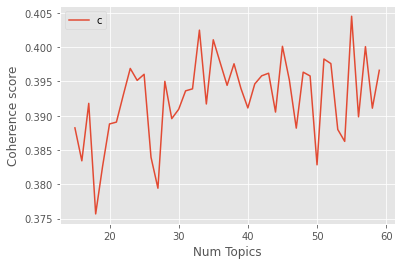

In [ ]:
# Show graph
start=start; limit=limit; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
from tqdm import tqdm
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in tqdm(range(start, limit, step)):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word, random_seed=12345, optimize_interval = 10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=start, limit=limit, step=step)

100%|██████████| 45/45 [48:46<00:00, 65.04s/it]


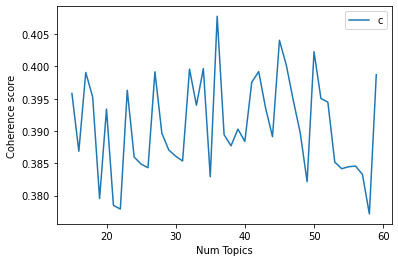

In [ ]:
# Show graph
start=start; limit=limit; step=step;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
#random seed 6 after pruning
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 14  has Coherence Value of 0.3893
Num Topics = 15  has Coherence Value of 0.3958
Num Topics = 16  has Coherence Value of 0.3869
Num Topics = 17  has Coherence Value of 0.3991
Num Topics = 18  has Coherence Value of 0.3953
Num Topics = 19  has Coherence Value of 0.3796
Num Topics = 20  has Coherence Value of 0.3934
Num Topics = 21  has Coherence Value of 0.3785
Num Topics = 22  has Coherence Value of 0.3779
Num Topics = 23  has Coherence Value of 0.3963


In [ ]:
#random seed 6
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3562
Num Topics = 3  has Coherence Value of 0.348
Num Topics = 4  has Coherence Value of 0.3676
Num Topics = 5  has Coherence Value of 0.3372
Num Topics = 6  has Coherence Value of 0.3716
Num Topics = 7  has Coherence Value of 0.3653
Num Topics = 8  has Coherence Value of 0.3775
Num Topics = 9  has Coherence Value of 0.3815
Num Topics = 10  has Coherence Value of 0.3707
Num Topics = 11  has Coherence Value of 0.3893
Num Topics = 12  has Coherence Value of 0.3746
Num Topics = 13  has Coherence Value of 0.3773
Num Topics = 14  has Coherence Value of 0.3817
Num Topics = 15  has Coherence Value of 0.3799
Num Topics = 16  has Coherence Value of 0.3921
Num Topics = 17  has Coherence Value of 0.3769
Num Topics = 18  has Coherence Value of 0.3973
Num Topics = 19  has Coherence Value of 0.4031
Num Topics = 20  has Coherence Value of 0.4001
Num Topics = 21  has Coherence Value of 0.3887
Num Topics = 22  has Coherence Value of 0.3823
Num Topics = 23  has C

In [ ]:
#random seed 42 cv4093
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3579
Num Topics = 6  has Coherence Value of 0.3646
Num Topics = 10  has Coherence Value of 0.3822
Num Topics = 14  has Coherence Value of 0.3897
Num Topics = 18  has Coherence Value of 0.3913
Num Topics = 22  has Coherence Value of 0.3828
Num Topics = 26  has Coherence Value of 0.3941
Num Topics = 30  has Coherence Value of 0.4093
Num Topics = 34  has Coherence Value of 0.3919
Num Topics = 38  has Coherence Value of 0.3958


In [ ]:
#random seed 5
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3562
Num Topics = 3  has Coherence Value of 0.3313
Num Topics = 4  has Coherence Value of 0.3514
Num Topics = 5  has Coherence Value of 0.362
Num Topics = 6  has Coherence Value of 0.3574
Num Topics = 7  has Coherence Value of 0.3654
Num Topics = 8  has Coherence Value of 0.3809
Num Topics = 9  has Coherence Value of 0.3771
Num Topics = 10  has Coherence Value of 0.3933
Num Topics = 11  has Coherence Value of 0.3814
Num Topics = 12  has Coherence Value of 0.3709
Num Topics = 13  has Coherence Value of 0.3921
Num Topics = 14  has Coherence Value of 0.3888
Num Topics = 15  has Coherence Value of 0.3878
Num Topics = 16  has Coherence Value of 0.4023
Num Topics = 17  has Coherence Value of 0.3942
Num Topics = 18  has Coherence Value of 0.4117
Num Topics = 19  has Coherence Value of 0.3748
Num Topics = 20  has Coherence Value of 0.3937
Num Topics = 21  has Coherence Value of 0.3969
Num Topics = 22  has Coherence Value of 0.3998
Num Topics = 23  has C

In [ ]:
# Select the model and print the topics
optimal_model = model_list[7]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(7,
  '0.062*"student" + 0.035*"mathematical" + 0.018*"slope" + 0.016*"action" + '
  '0.015*"artifact" + 0.014*"display" + 0.013*"object" + 0.013*"calculator" + '
  '0.012*"learn" + 0.012*"study"'),
 (25,
  '0.037*"student" + 0.031*"task" + 0.020*"technique" + 0.016*"test" + '
  '0.015*"level" + 0.013*"assessment" + 0.012*"expression" + 0.011*"item" + '
  '0.011*"didactic" + 0.010*"exercise"'),
 (15,
  '0.037*"book" + 0.026*"mathematical" + 0.024*"digital" + 0.023*"design" + '
  '0.019*"creativity" + 0.018*"creative" + 0.016*"process" + 0.015*"resource" '
  '+ 0.014*"reflection" + 0.012*"cmt"'),
 (28,
  '0.068*"vector" + 0.043*"transformation" + 0.028*"student" + 0.016*"cerme" + '
  '0.012*"plane" + 0.012*"notion" + 0.011*"ebooks_erme" + 0.011*"http_www" + '
  '0.011*"concept" + 0.011*"variable"'),
 (14,
  '0.045*"spreadsheet" + 0.021*"datum" + 0.021*"child" + 0.020*"cerme" + '
  '0.018*"area" + 0.018*"formula" + 0.016*"make" + 0.014*"column" + '
  '0.014*"work" + 0.014*"activity"'),


In [ ]:
optimal_model_lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(optimal_model_lda, corpus, id2word)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.073003 -0.096005       1        1  16.921444
26     0.109203  0.068847       2        1   6.463979
13     0.085728 -0.092316       3        1   6.269636
11     0.243113 -0.112681       4        1   6.199611
18     0.159763  0.086024       5        1   5.708503
0     -0.056795  0.133099       6        1   4.514582
12    -0.169627  0.032297       7        1   4.335575
19     0.008824 -0.014620       8        1   3.441205
27    -0.104240  0.042584       9        1   3.154347
29     0.156057 -0.108318      10        1   2.956103
20     0.033426  0.127017      11        1   2.779160
22     0.105056  0.157199      12        1   2.650218
6     -0.062281  0.005375      13        1   2.559230
2      0.043049  0.140614      14        1   2.534021
24     0.116353 -0.053302      15        1   2.495450
17     0.097246 -0.126358      16        1   2.403092
4      0.106589 -0.011416      17        1   2.373410
5      0.086750  0.045106      18        1   2.357962
8     -0.150568  0.099535      19        1   2.318758
10     0.102052  0.087373      20        1   2.231858
9     -0.139079 -0.035102      21        1   2.192390
3     -0.162805 -0.060726      22        1   1.955407
21    -0.036165 -0.141599      23        1   1.911047
23    -0.113776 -0.130400      24        1   1.686568
1     -0.195500 -0.064291      25        1   1.651090
14    -0.080771  0.059510      26        1   1.272669
15    -0.063637 -0.257979      27        1   1.219938
28    -0.156181  0.066963      28        1   1.215234
25     0.081092  0.103050      29        1   1.157101
7     -0.115880  0.050519      30        1   1.070410, topic_info=             Term          Freq         Total Category  logprob  loglift
547       teacher   8445.000000   8445.000000  Default  30.0000  30.0000
531       student  12903.000000  12903.000000  Default  29.0000  29.0000
328  mathematical   4456.000000   4456.000000  Default  28.0000  28.0000
553    technology   3880.000000   3880.000000  Default  27.0000  27.0000
545          task   3394.000000   3394.000000  Default  26.0000  26.0000
..            ...           ...           ...      ...      ...      ...
181   environment     41.149473   2034.694372  Topic30  -4.8944   0.6362
9        activity     43.373769   3479.307563  Topic30  -4.8418   0.1524
414       process     38.925177   2502.931433  Topic30  -4.9500   0.3736
234          give     34.476586   2146.110563  Topic30  -5.0713   0.4060
22       analysis     33.364438   1302.896715  Topic30  -5.1041   0.8723

[3073 rows x 6 columns], token_table=       Topic      Freq               Term
term                                     
5922       7  0.996344                 ab
3128      10  1.087764   abboud_blanchard
6742      22  0.976805          abduction
6743      22  1.098906          abductive
6744      22  0.879125           aberdein
...      ...       ...                ...
7860      16  0.889868  yerushalmy_chazan
2039      20  1.007759            youtube
9302      14  0.859111                yxf
5453      23  0.875068       zentralblatt
10973     26  1.141613                zoo

[7796 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 27, 14, 12, 19, 1, 13, 20, 28, 30, 21, 23, 7, 3, 25, 18, 5, 6, 9, 11, 10, 4, 22, 24, 2, 15, 16, 29, 26, 8])

In [ ]:
# Save to html file
pyLDAvis.save_html(vis, '/content/drive/My Drive/Aau/Projekter/Igang/Review matematikdidaktik og teknologi/Math tech review - Shared Repository/Visualizations/vismallet_17_cv04024_rs42_oi10.html')

In [ ]:
df.Abstract[45]

'This paper suggests that knowledge of the school mathematics curriculum, as one of the key components of teachers\' education, can be extended to include concepts and structures that generally belong to hidden domains of the curriculum. Motivated by work done with elementary pre-service teachers in a mathematics course employing a hidden mathematics curriculum framework (Abramovich &amp; Brouwer, 2003a), this paper shows how computing technology, including "The Geometer\'s Sketchpad" and spreadsheet environments, facilitate the development of entries into advanced mathematical ideas dealing with the partition of unit (Egyptian) fractions. The combination of Freudenthal\'s pedagogy of learning mathematics as advancement of the culture of mankind and Vygotskian theory of learning in a social context provides theoretical underpinning for this framework. (Contains 8 figures and 3 notes.)'

## Descriptives of topics

### Finding the dominant topic in each document

In [ ]:
ldamallet13 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=13, id2word=id2word, random_seed=104, optimize_interval = 10)
ldamallet25 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word, random_seed=112, optimize_interval = 10)
ldamallet29 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=29, id2word=id2word, random_seed=100, optimize_interval = 10)

In [ ]:
optimal_model_lda = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(ldamallet29)

In [ ]:
def format_topics_sentences(ldamodel=optimal_model_lda, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model_lda, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

df_dominant_topic.Text = df_dominant_topic.Text.str.strip()
# Show
df_dominant_topic.head(21)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,13.0,0.3029,"group, comment, community, work, share, commun...",Analysing MOOCs in terms of teacher collaborat...
1,1,22.0,0.1977,"student, activity, mathematical, learn, learni...",‘Walking a graph’ – primary school students’ e...
2,2,24.0,0.4125,"student, online, study, learn, resource, lectu...",Using a flipped classroom approach in the teac...
3,3,17.0,0.5767,"task, feedback, student, solution, assessment,...",What can we assess using multiple choice probl...
4,4,21.0,0.3072,"resource, material, teacher, textbook, platfor...",Planning geometry lessons with learning platfo...
5,5,0.0,0.4703,"book, design, student, idea, digital, variable...",Teachers designing e-books to foster creative ...
6,6,21.0,0.5882,"resource, material, teacher, textbook, platfor...",Identifying and assessing quality criteria for...
7,7,14.0,0.2811,"teacher, student, lesson, classroom, work, pra...",“One of the beauties of Autograph is … that yo...
8,8,9.0,0.3975,"teacher, knowledge, technology, geogebra, teac...",The effect of GeoGebra collaborative and itera...
9,9,9.0,0.4430,"teacher, knowledge, technology, geogebra, teac...",Maths teachers’ adventure of ICT integration: ...


In [ ]:
def format_topics_sentences(ldamodel=optimal_model_lda, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    #abstracts = df.Abstract
    ids = df['Filename']
    sent_topics_df = pd.concat([sent_topics_df, contents, ids], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model_lda, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text', 'Filename']

# Show
df_dominant_topic.head(21)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Filename
0,0,13.0,0.3029,"group, comment, community, work, share, commun...",Analysing MOOCs in terms of teacher collaborat...,CERME_10_group_15_paper_1
1,1,22.0,0.1977,"student, activity, mathematical, learn, learni...",‘Walking a graph’ – primary school students’ e...,CERME_10_group_15_paper_10
2,2,24.0,0.4125,"student, online, study, learn, resource, lectu...",Using a flipped classroom approach in the teac...,CERME_10_group_15_paper_11
3,3,17.0,0.5767,"task, feedback, student, solution, assessment,...",What can we assess using multiple choice probl...,CERME_10_group_15_paper_12
4,4,21.0,0.3072,"resource, material, teacher, textbook, platfor...",Planning geometry lessons with learning platfo...,CERME_10_group_15_paper_13
5,5,0.0,0.4703,"book, design, student, idea, digital, variable...",Teachers designing e-books to foster creative ...,CERME_10_group_15_paper_14
6,6,21.0,0.5882,"resource, material, teacher, textbook, platfor...",Identifying and assessing quality criteria for...,CERME_10_group_15_paper_15
7,7,14.0,0.2811,"teacher, student, lesson, classroom, work, pra...",“One of the beauties of Autograph is … that yo...,CERME_10_group_15_paper_16
8,8,9.0,0.3975,"teacher, knowledge, technology, geogebra, teac...",The effect of GeoGebra collaborative and itera...,CERME_10_group_15_paper_17
9,9,9.0,0.4430,"teacher, knowledge, technology, geogebra, teac...",Maths teachers’ adventure of ICT integration: ...,CERME_10_group_15_paper_18


In [ ]:
df_sorted = df_dominant_topic.sort_values(by=['Dominant_Topic', 'Topic_Perc_Contrib'], ascending=False)

In [ ]:
for i in range(1, len(df_sorted.Dominant_Topic.unique())+1):
    globals()['df_t{}'.format(i)] = df_sorted.loc[df_sorted['Dominant_Topic'] == i - 1]
    globals()['df_t{}'.format(i)].reset_index(inplace=True)
    globals()['df_t{}'.format(i)].to_csv(project_path + 'mallet29_topic{}.csv'.format(i))

In [ ]:
df_t10

,index,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,Filename
0,323,323,9.0,0.5526,"student, expression, equation, number, task, v...",WORKING GROUP 15 BRIDGING DIAGNOSIS AND LEARNI...,CERME_8_group_15_paper_20
1,227,227,9.0,0.5271,"student, expression, equation, number, task, v...",The diagnostic assessment Pépite and the quest...,CERME_9_group_15_paper_18
2,25,25,9.0,0.5266,"student, expression, equation, number, task, v...",PÉPITE Online automated assessment and student...,CERME_10_group_15_paper_9
3,239,239,9.0,0.4417,"student, expression, equation, number, task, v...",Formalising functional dependencies: The poten...,CERME_9_group_15_paper_9
4,94,94,9.0,0.4308,"student, expression, equation, number, task, v...",Exploring the role of context in students’ mea...,CERME_11_group_16_paper_32
5,241,241,9.0,0.3793,"student, expression, equation, number, task, v...",Crossing the bridge: From a constructionist le...,CERME_9_group_16_paper_10
6,298,298,9.0,0.3552,"student, expression, equation, number, task, v...",Working Group 9 MEMORIZING ALGEBRAIC FORMULAS:...,CERME_5_group_9_paper_14
7,92,92,9.0,0.3465,"student, expression, equation, number, task, v...",Automated feedback on the structure of hypothe...,CERME_11_group_16_paper_30
8,180,180,9.0,0.3207,"student, expression, equation, number, task, v...",WORKING GROUP 7 RELATIONSHIP BETWEEN DESIGN AN...,CERME_6_group_7_paper_40
9,175,175,9.0,0.3155,"student, expression, equation, number, task, v...",WORKING GROUP 7 THE DESIGN OF NEW DIGITAL ARTE...,CERME_6_group_7_paper_36


In [ ]:
    print('#Topic Model CERME')
    for i in range(1, len(df_sorted.Dominant_Topic.unique())+1):
      try:
        print('##Topic ' + str(i))
        for a in range(5):
          print(globals()['df_t{}'.format(i)].Text[a][:2400])
          print('\n')
          print('- Topic contribution: ' + str(globals()['df_t{}'.format(i)].Topic_Perc_Contrib[a]))
          print('- What technology: ')
          print('- Role of technology: ')
          print('- User of technology: ')
          print('- Educational level: ')
          print('\n\n')
      except KeyError:
        continue
      print('\n')

#Topic Model CERME
##Topic 1
Meaning-generation through an interplay between problem solving and constructionism in the C-book technology environment Ioannis Papadopoulos1, Dimitris Diamantidis2, and Chronis Kynigos3 1Aristotle University of Thessaloniki and CTI & Press Diophantus, Greece, ypapadop@eled.auth.gr 2 University of Athens and CTI & Press Diophantus, Greece, dimitrd@ppp.uoa.gr 3University of Athens and CTI & Press Diophantus, kynigos@ppp.uoa.gr Starting from Silver’s (1997) approach for the importance of the interplay between problem solving and posing in the agenda of creativity, a new kind of e-book, aiming to promote creative mathematical thinking to students, in which its designers enriched the posing element with a constructionist approach, is used and examined in a real classroom. The paper follows a pair of Grade-8 students while they are working on this book. The contribution of this new interplay in the meaning-generation process around the concept of covariation is

In [ ]:
df_dominant_topic.to_excel(project_path + 'mallet29_domtopic.xlsx')

In [ ]:
df_dominant_topic.to_csv(project_path + 'mallet29_domtopic.csv', sep='\t')

### Finding the most representative documents for each topic

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.6695,"teacher, resource, practice, situation, activi...",Working Group 9 Teacher’s practices and degree...
1,1.0,0.9025,"student, task, test, group, result, study, fee...",Automated feedback on the structure of hypothe...
2,2.0,0.9019,"pupil, number, fraction, work, make, child, ac...",European Research in Mathematics Education I: ...
3,3.0,0.8649,"student, study, work, online, teacher, questio...",University students’ engagement with an asynch...
4,4.0,0.9563,"student, expression, algebra, function, equati...",European Research in Mathematics Education I: ...


### Number of documents per topic

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.head(13)

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,10.0,"teacher, resource, activity, practice, work, g...",31.0,0.0909
1.0,0.0,"student, teacher, work, task, tool, lesson, pr...",15.0,0.0440
2.0,7.0,"resource, student, learn, online, learning, st...",19.0,0.0557
3.0,6.0,"task, problem, mathematical, solution, feedbac...",28.0,0.0821
4.0,10.0,"teacher, resource, activity, practice, work, g...",16.0,0.0469
5.0,8.0,"student, mathematical, programming, design, ma...",66.0,0.1935
6.0,7.0,"resource, student, learn, online, learning, st...",13.0,0.0381
7.0,0.0,"student, teacher, work, task, tool, lesson, pr...",21.0,0.0616
8.0,11.0,"teacher, technology, teach, mathematic, knowle...",20.0,0.0587
9.0,11.0,"teacher, technology, teach, mathematic, knowle...",23.0,0.0674


### Topic distribution across documents

In [ ]:
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [ ]:
ldamallet13 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=13, id2word=id2word, random_seed=104, optimize_interval = 10)
ldamallet25 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word, random_seed=112, optimize_interval = 10)
ldamallet29 = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=29, id2word=id2word, random_seed=100, optimize_interval = 10)

In [ ]:
from tqdm.notebook import tqdm

iterList = [13, 25, 29]
for z in tqdm(iterList, desc='1st loop'):


  # create DataFrame using data 
  globals()['topics_docs{}'.format(z)] = pd.DataFrame(columns =['topic', 'topic contribution', 'document number']) 

  for i in tqdm(range(len(globals()['ldamallet{}'.format(z)][corpus])), desc='2nd loop'):
    temp = pd.DataFrame(globals()['ldamallet{}'.format(z)][corpus][i], columns =['topic', 'topic contribution',])
    temp['document number'] = i
    globals()['topics_docs{}'.format(z)] = globals()['topics_docs{}'.format(z)].append(temp)

  globals()['topics_docs{}'.format(z)] = globals()['topics_docs{}'.format(z)].pivot(index = 'document number', columns='topic', values = 'topic contribution')

  columnnames = {}
  for i in range(len(globals()['topics_docs{}'.format(z)].columns)):
    columnnames.update({globals()['topics_docs{}'.format(z)].columns[i]:"topic {} contribution".format(globals()['topics_docs{}'.format(z)].columns[i])})
  globals()['topics_docs{}'.format(z)] = globals()['topics_docs{}'.format(z)].rename(columns = columnnames)
  globals()['topics_docs{}'.format(z)].columns.name=None
  globals()['topics_docs{}'.format(z)].index.name=None
  globals()['topics_docs{}'.format(z)]

  globals()['df_topicDist{}'.format(z)] = pd.concat([df, globals()['topics_docs{}'.format(z)]], axis=1)

  globals()['topics_docs{}'.format(z)].to_csv(project_path + 'topicdist{}.csv'.format(z), sep='\t')
  globals()['df_topicDist{}'.format(z)].to_csv(project_path + 'fulltextandtopicdist{}.csv'.format(z), sep='\t')